## Data Set Context

# Task

### importing all the Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif ,f_regression
from sklearn.metrics import mean_absolute_error,max_error,mean_squared_error

# importing the two data frame from the nearby distance with same attributes 

In [30]:
df1=pd.read_csv('D:\\python\\wind speed\\PRSA_Data_Nongzhanguan_20130301-20170228.csv')

In [31]:
df2=pd.read_csv('D:\\python\\wind speed\\PRSA_Data_Aotizhongxin_20130301-20170228.csv')

# concating the dataframes

In [32]:
df=pd.concat([df1,df2],ignore_index=True)

In [33]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


## drop the variables from the dataframe bcz we are not going to work on it

In [34]:
df.drop(['No','year','month','day','hour','station','wd'],axis='columns',inplace=True)

In [35]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,68575.000000,68970.000000,68747.000000,68413.000000,67146.000000,67903.000000,70088.000000,70088.000000,70088.000000,70088.000000,70100.000000
mean,83.810518,109.523589,18.037243,58.698579,1293.908304,57.463504,13.628049,1012.197170,2.785298,0.065720,1.784641
std,84.219918,95.283156,23.577271,36.711977,1233.831819,58.173520,11.428797,10.341142,13.753981,0.850419,1.245127
min,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,22.000000,38.000000,3.000000,30.000000,500.000000,9.000000,3.100000,1003.600000,-8.500000,0.000000,1.000000
50%,59.000000,86.000000,9.000000,52.000000,900.000000,44.000000,14.600000,1011.900000,3.400000,0.000000,1.500000
75%,115.000000,152.000000,22.000000,81.000000,1600.000000,83.000000,23.400000,1020.600000,15.300000,0.000000,2.300000
max,898.000000,995.000000,341.000000,290.000000,10000.000000,423.000000,41.100000,1042.000000,28.800000,72.500000,11.200000


### as you can see above i have describe the df  and see below i have drop the all nul value bcz i gonot need it

In [36]:
df.dropna(inplace=True)

### info on featureof the Data set

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65052 entries, 0 to 70127
Data columns (total 11 columns):
PM2.5    65052 non-null float64
PM10     65052 non-null float64
SO2      65052 non-null float64
NO2      65052 non-null float64
CO       65052 non-null float64
O3       65052 non-null float64
TEMP     65052 non-null float64
PRES     65052 non-null float64
DEWP     65052 non-null float64
RAIN     65052 non-null float64
WSPM     65052 non-null float64
dtypes: float64(11)
memory usage: 6.0 MB


In [38]:
df.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [39]:
df.shape

(65052, 11)

## now we have found the co-relation b/w the whole dataframe

In [40]:
df.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.890894,0.514196,0.687645,0.800867,-0.178478,-0.151879,0.011053,0.110067,-0.021673,-0.294191
PM10,0.890894,1.000000,0.501935,0.664599,0.711567,-0.155502,-0.129762,-0.017315,0.055879,-0.033175,-0.197389
SO2,0.514196,0.501935,1.000000,0.468224,0.554011,-0.195429,-0.356516,0.219130,-0.274744,-0.045049,-0.133178
NO2,0.687645,0.664599,0.468224,1.000000,0.695687,-0.516808,-0.275392,0.107959,0.021295,-0.048068,-0.481982
CO,0.800867,0.711567,0.554011,0.695687,1.000000,-0.320131,-0.341763,0.182991,-0.057339,-0.015868,-0.312189
O3,-0.178478,-0.155502,-0.195429,-0.516808,-0.320131,1.000000,0.599037,-0.439253,0.302203,0.024659,0.330387
TEMP,-0.151879,-0.129762,-0.356516,-0.275392,-0.341763,0.599037,1.000000,-0.832692,0.819715,0.038440,0.040161
PRES,0.011053,-0.017315,0.219130,0.107959,0.182991,-0.439253,-0.832692,1.000000,-0.772881,-0.065710,0.059494
DEWP,0.110067,0.055879,-0.274744,0.021295,-0.057339,0.302203,0.819715,-0.772881,1.000000,0.088705,-0.294833
RAIN,-0.021673,-0.033175,-0.045049,-0.048068,-0.015868,0.024659,0.038440,-0.065710,0.088705,1.000000,0.024114


# Feature Selection

### Now we have to select the best features which are affecting our pressure variable

In [41]:
feature=df.loc[:,df.columns != 'PRES']
target=df.loc[:,df.columns == 'PRES']


## for feature selection we use ANOVA function

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [43]:
bestfeatures=SelectKBest(score_func=f_classif,k=3)

In [44]:
fit=bestfeatures.fit(feature,target)
feature_score=pd.DataFrame(fit.scores_)
feature_score.head()

C:\Users\Rageshwar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,5.465581
1,6.324663
2,9.006268
3,8.107874
4,8.832956


In [45]:
feature_Column_name=pd.DataFrame(feature.columns)

In [48]:
feature_Column_name.head()

,0
0,PM2.5
1,PM10
2,SO2
3,NO2
4,CO


In [50]:
feature_score_df = pd.concat([feature_Column_name,feature_score],axis=1)
feature_score_df.columns=['Features','Score']
feature_score_df

,Features,Score
0,PM2.5,5.465581
1,PM10,6.324663
2,SO2,9.006268
3,NO2,8.107874
4,CO,8.832956
5,O3,35.247758
6,TEMP,275.870232
7,DEWP,181.510272
8,RAIN,2.454143
9,WSPM,3.352436


### Top 10 feature with best score

In [51]:
print(feature_score_df.nlargest(10,'Score'))

  Features       Score
6     TEMP  275.870232
7     DEWP  181.510272
5       O3   35.247758
2      SO2    9.006268
4       CO    8.832956
3      NO2    8.107874
1     PM10    6.324663
0    PM2.5    5.465581
9     WSPM    3.352436
8     RAIN    2.454143


In [78]:
new_df=df[['TEMP','DEWP','O3','SO2','CO','NO2','PM10','PM2.5','PRES']]

### selecting top 8 features for independent variable

In [86]:
x=df[['TEMP','DEWP','O3','SO2','CO','NO2','PM10','PM2.5']].values
y=df[['PRES']].values

In [87]:
print('Independent variable',x.shape)
print('Depenent variable',y.shape)

Independent variable (65052, 8)
Depenent variable (65052, 1)


### plotting scatter plot of all features

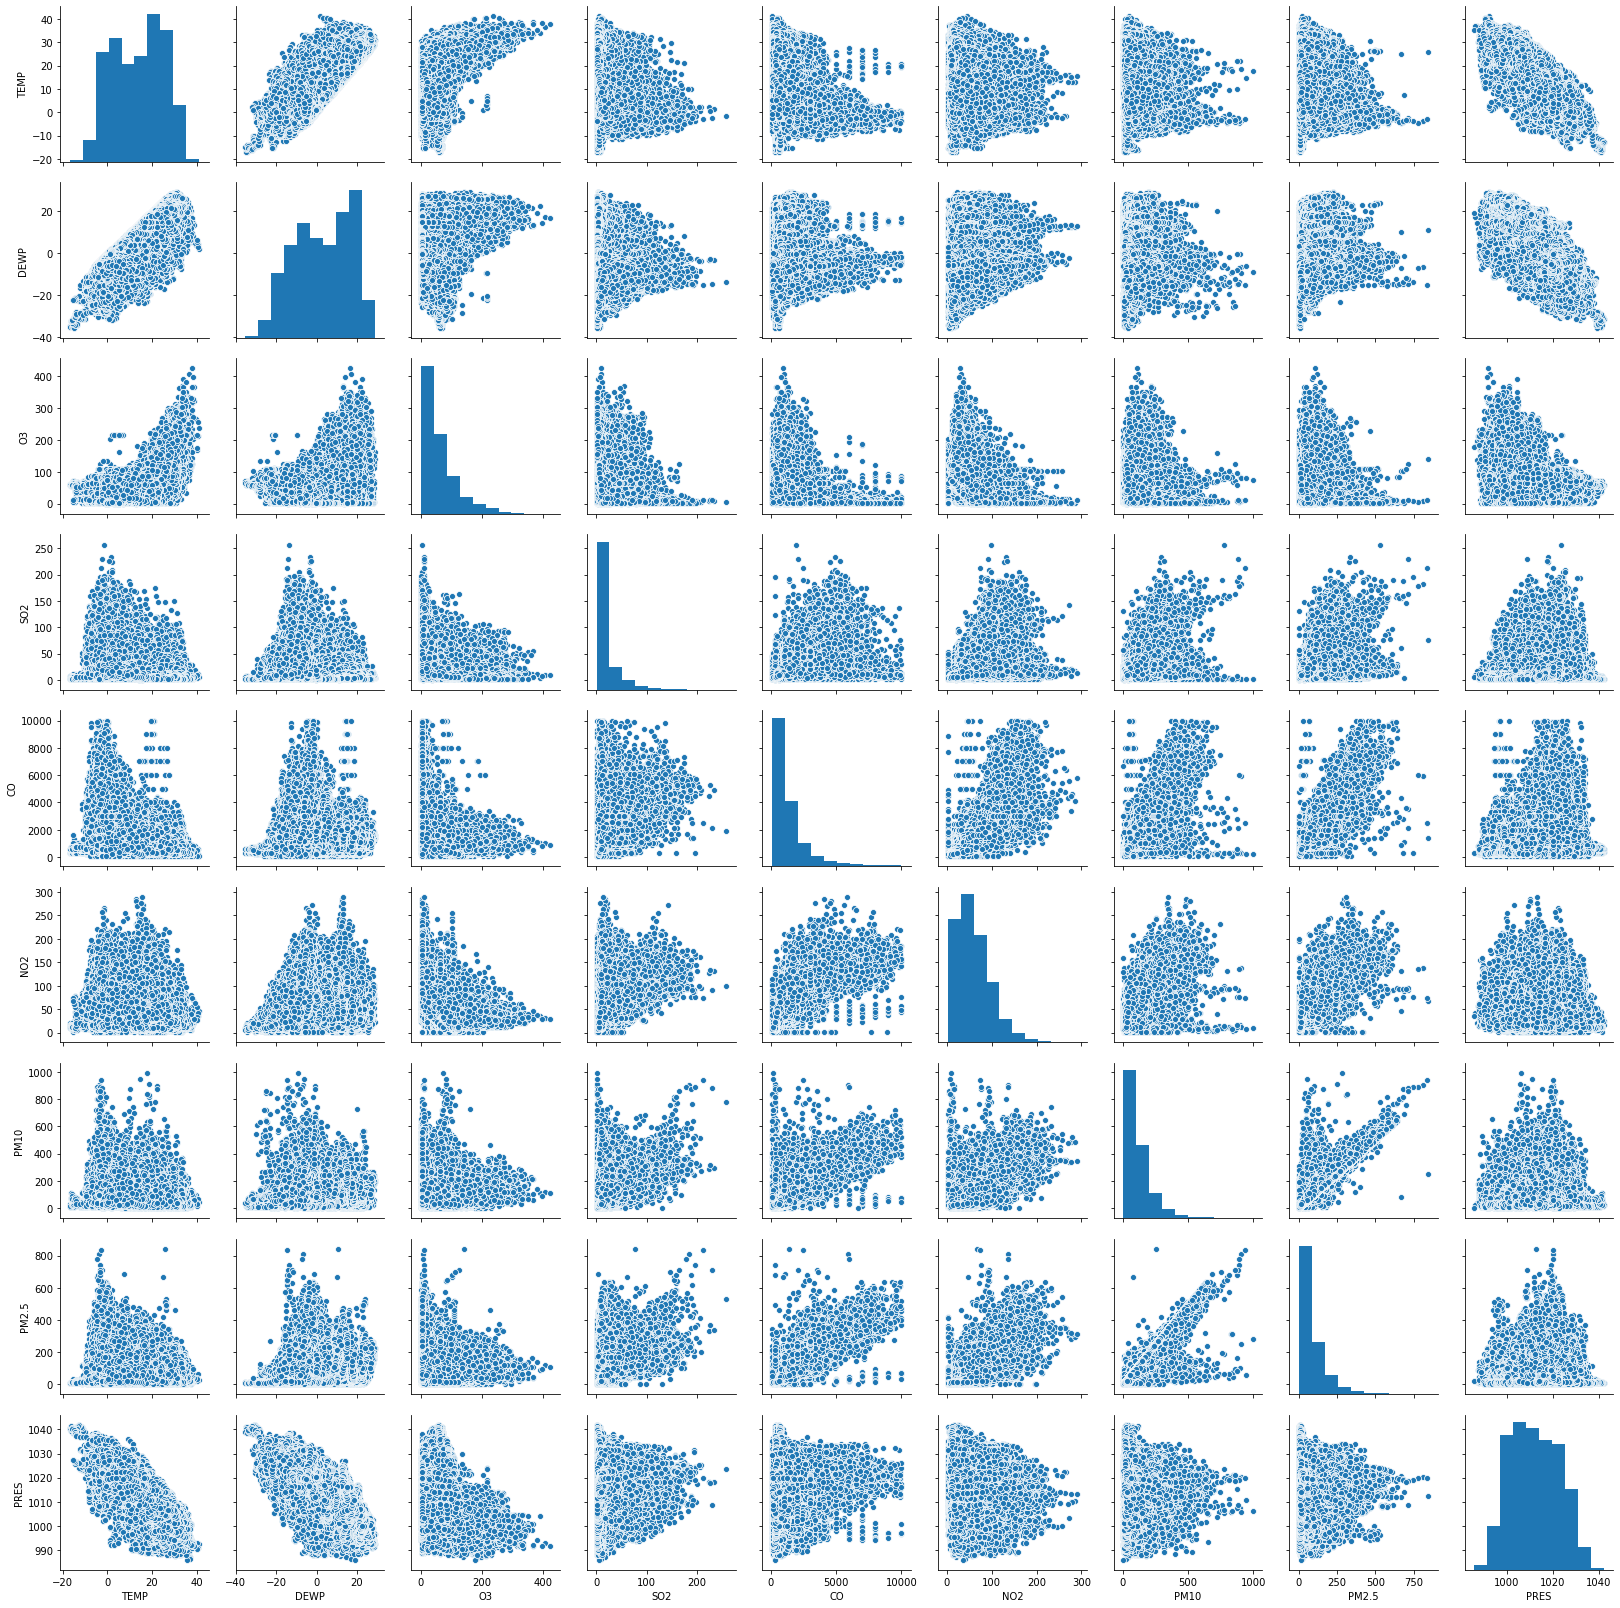

In [61]:
import seaborn as sns
sns.pairplot(new_df)

## ploting the matrix corealtion b/w different variable to check the variability 

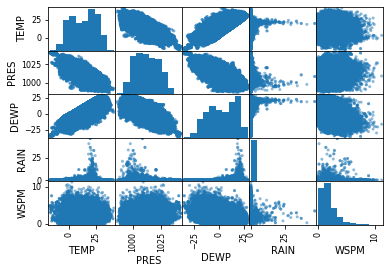

In [13]:
pd.plotting.scatter_matrix(df.loc[:,'TEMP':'WSPM'])
plt.show()

## Pressure Distribution

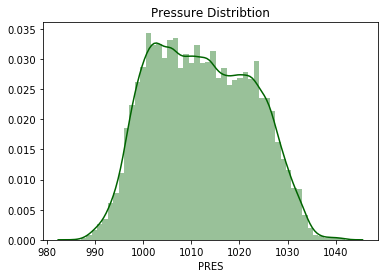

In [88]:
plt.title('Pressure Distribtion')
sns.distplot(new_df['PRES'],color='Darkgreen')

## by observing the matrix corelation i have found that temp,windspeed and dewpoint has good relation with pressure

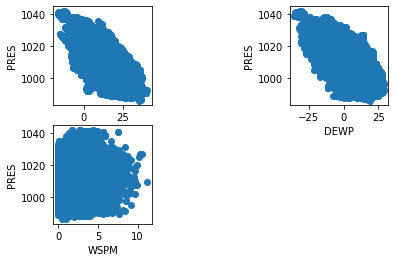

In [14]:
plt.Figure(figsize=(16,9))
plt.subplot(2,3,1)
plt.scatter(df['TEMP'],df['PRES'])
plt.xlabel('TEMP')
plt.ylabel('PRES')

plt.subplot(2,3,3)
plt.scatter(df['DEWP'],df['PRES'])
plt.xlabel('DEWP')
plt.ylabel('PRES')

plt.subplot(2,3,4)
plt.scatter(df['WSPM'],df['PRES'])
plt.xlabel('WSPM')
plt.ylabel('PRES')
plt.show()

In [89]:
new_df.head()

,TEMP,DEWP,O3,SO2,CO,NO2,PM10,PM2.5,PRES
0,-0.5,-21.4,85.0,4.0,200.0,12.0,14.0,5.0,1024.5
1,-0.7,-22.1,84.0,6.0,200.0,14.0,12.0,8.0,1025.1
2,-1.2,-24.6,83.0,5.0,200.0,14.0,6.0,3.0,1025.3
3,-1.4,-25.5,84.0,5.0,200.0,14.0,5.0,5.0,1026.2
4,-1.9,-24.5,77.0,6.0,200.0,21.0,5.0,5.0,1027.1


## We are going to do standard scalar scale because x variables has diffrent magnitute and Unit

In [91]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

In [92]:
x[0:5]

array([[-1.24620924, -1.76720799,  0.47449735, -0.59134181, -0.88416399,
        -1.26940025, -1.00841314, -0.9421752 ],
       [-1.26373565, -1.81818183,  0.45731384, -0.5060762 , -0.88416399,
        -1.21495013, -1.02960509, -0.90609667],
       [-1.30755165, -2.00023123,  0.44013034, -0.548709  , -0.88416399,
        -1.21495013, -1.09318092, -0.96622755],
       [-1.32507805, -2.06576902,  0.45731384, -0.548709  , -0.88416399,
        -1.21495013, -1.10377689, -0.9421752 ],
       [-1.36889406, -1.99294926,  0.3370293 , -0.5060762 , -0.88416399,
        -1.0243747 , -1.10377689, -0.9421752 ]])

### Splitting the dataset into the train and test

In [93]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=0)

In [94]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (58546, 8) and test_x : (6506, 8)
Size of train_y : (58546, 1) and test_y : (6506, 1)


### Implenting and fitting the model

In [95]:
mlr=LinearRegression()
mlr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicting the value 

In [96]:
pred_y=mlr.predict(test_x)


In [97]:
test_x

array([[ 0.98840709,  1.38588775, -0.19565943, ...,  0.01017763,
        -0.04417974,  0.01991895],
       [ 0.19971897, -0.82055107,  0.02772617, ..., -1.16050001,
        -0.9872212 , -0.96622755],
       [ 1.54925197,  1.46598949,  2.26158209, ..., -0.99714964,
        -0.43623068, -0.30478782],
       ...,
       [ 1.03222309,  0.94168719,  0.99000257, ..., -0.6704489 ,
        -0.47861457, -0.30478782],
       [-0.2647307 , -0.66034759,  0.45731384, ...,  0.28242824,
         0.25250746,  0.27246867],
       [-0.83433878, -0.92978072, -0.8486327 , ...,  0.41855355,
        -0.45742263, -0.40099724]])

In [98]:
pred_y

array([[1002.26771417],
       [1014.0548092 ],
       [ 998.94713531],
       ...,
       [1003.63216754],
       [1013.41396032],
       [1020.4206288 ]])

In [108]:
print('Coeffiencet')
mlr.coef_

Coeffiencet


array([[-6.56161915, -2.81182842,  0.0635829 , -0.6638037 ,  0.1778141 ,
        -0.1637922 , -1.59528952,  1.16040866]])

In [109]:
print('Inercept')
mlr.intercept_

Inercept


array([1012.17719357])

### Finding the Score

In [101]:
mlr.score(test_x,test_y)

0.7306477486143454

In [102]:
from sklearn.metrics import r2_score
r2_score(test_y,pred_y)

0.7306477486143454

### finding the Error

In [103]:
from sklearn.metrics import mean_absolute_error,max_error,mean_squared_error
error=pd.DataFrame({'Error':[mean_absolute_error(test_y,pred_y),
                            max_error(test_y,pred_y),
                            mean_squared_error(test_y,pred_y),
                            mean_absolute_error(test_y,pred_y)**0.5]},
                  index=['Mean Absolute Error','Max Error','Mean Squared Error',"Root Mean Squared Error"])
error

,Error
Mean Absolute Error,4.244454
Max Error,24.560805
Mean Squared Error,28.885211
Root Mean Squared Error,2.060207


### ---------------------------------------------------------------------------------------------------------------------------------

# Now we check the accuracy of model by using 
# Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100)
RFR.fit(train_x,train_y)


C:\Users\Rageshwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### As we can see that that random forest has more accuracy than Multi Linear Regression

In [105]:
RFR.score(test_x,test_y)

0.8586868079309086